# Stock Analysis Using Stocker

We start by importing all the necessary libraries.

In [1]:
# Command for plotting in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from stocker import Stocker

# Creating our Stock Object

In [3]:
anant = Stocker(ticker = 'ANANTRAJ', exchange = 'NSE')

ANANTRAJ Stocker Initialized. Data covers 2006-09-27 to 2018-02-14.


# Plotting Stock History

The start and end dates are editable.

In [4]:
stock_history = anant.stock
stock_history.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),ds,Adj. Close,Adj. Open,y,Daily Change
2815,2018-02-07,56.90,58.8,56.6,57.1,57.20,1433367.0,826.88,2018-02-07,57.20,56.90,57.20,0.30
2816,2018-02-08,57.85,60.4,57.5,60.0,59.75,1650650.0,980.30,2018-02-08,59.75,57.85,59.75,1.90
2817,2018-02-09,57.50,60.0,56.6,59.7,59.35,1666228.0,988.28,2018-02-09,59.35,57.50,59.35,1.85
2818,2018-02-12,59.95,63.0,59.9,62.6,62.65,1882636.0,1161.20,2018-02-12,62.65,59.95,62.65,2.70
2819,2018-02-14,63.40,64.0,61.2,61.4,61.80,1263816.0,794.48,2018-02-14,61.80,63.40,61.80,-1.60


Maximum Adj. Close = 82.25 on 2018-01-10.
Minimum Adj. Close = 28.05 on 2016-02-25.
Current Adj. Close = 61.80 on 2018-02-14.



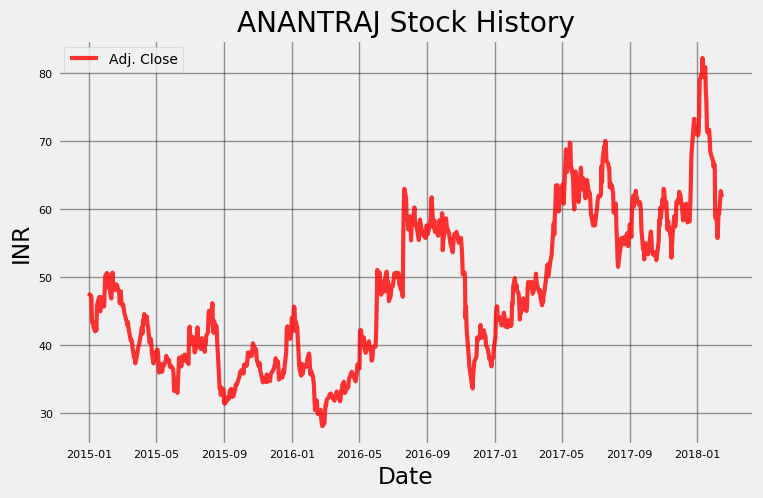

In [5]:
anant.plot_stock(start_date = '2015-01-01')

# Calculate whether you made a profit or a loss 

Here we use 'buy and hold' method from stocker. We specify the number of shares, the start date and the end date, and it calculates profit(if you're lucky enough) or a loss based on the number of shares that you hold.

ANANTRAJ Total buy and hold profit from 2018-01-22 to 2018-02-09 for 500 shares = $-6175.00


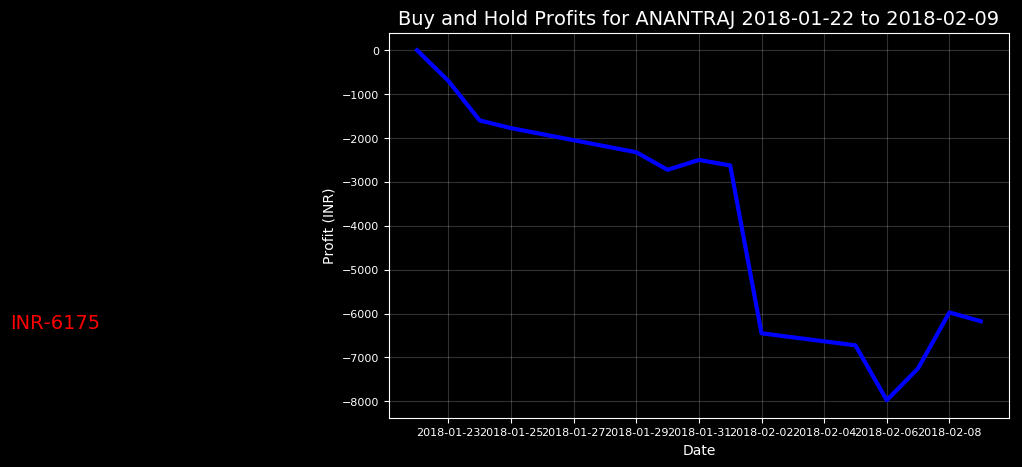

In [6]:
anant.buy_and_hold(start_date ='2018-01-22', end_date = '2018-02-09', nshares = 500)

# Creating prophet models

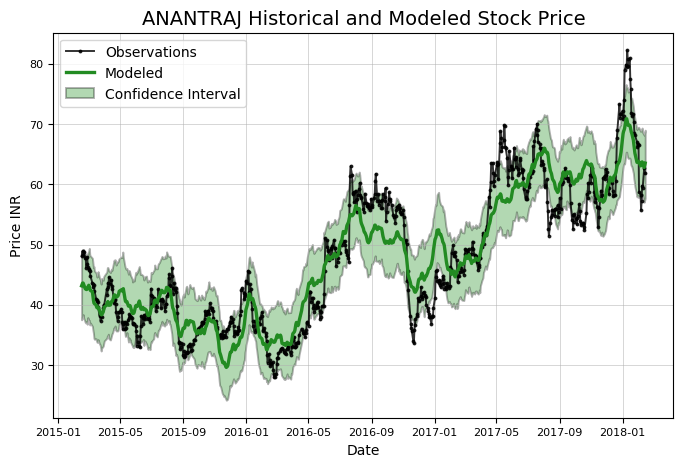

In [7]:
model, model_data = anant.create_prophet_model()

Plotiing the weekly and monthly trend components.

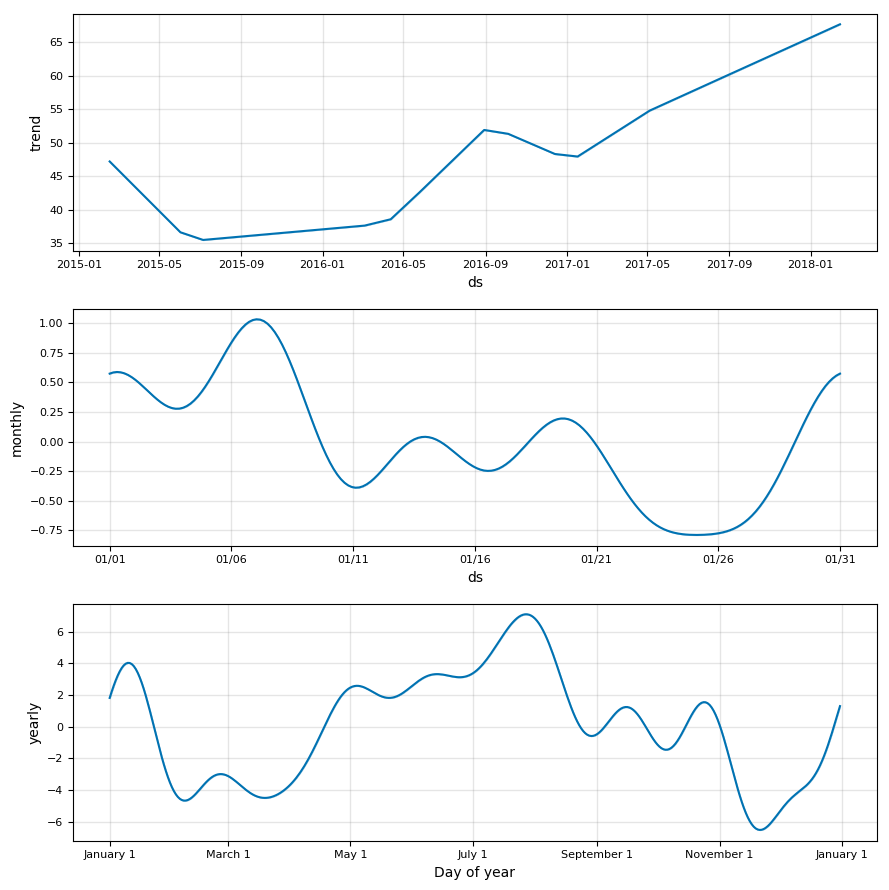

In [8]:
model.plot_components(model_data)
plt.show()

# Changepoint Date Analysis

This helps us observe the dates where prices changed significantly. 


 Top Related Queries: 

                  query  value
0         rera act 2017    100
1          rera act pdf     48
2      rera maharashtra     33
3  rera act maharashtra     32
4     rera act pdf 2017     31

 Rising Related Queries: 

               query    value
0      rera act 2017  1130450
1       rera act pdf   545750
2  rera act pdf 2017   346600
3     rera act india   274800
4       what is rera   249450


C:\Users\133924\Documents\Hitachi Consulting\Financial Analytics\stocker\stocker.py:789: FutureWarning: 
.resample() is now a deferred operation
You called reset_index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  trends = trends.reset_index(level=0)


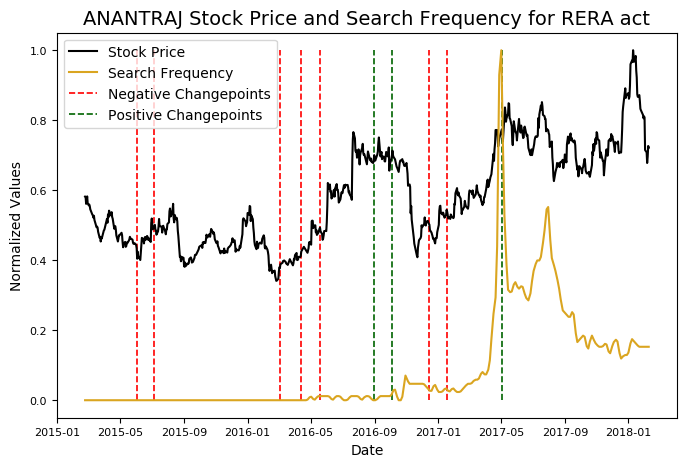

In [9]:
anant.changepoint_date_analysis(search = 'RERA act')

The above graph depicts the possible correlation between related google search trends and the changepoints, but I dont think there are any useful inferences here(except the last changepoint, not surprising at all)

# Predictions

Now that we have analyzed the stock, the next question is where is it going? For that we will have to turn to predictions! 

Predicted Price on 2018-04-15 = INR69.28


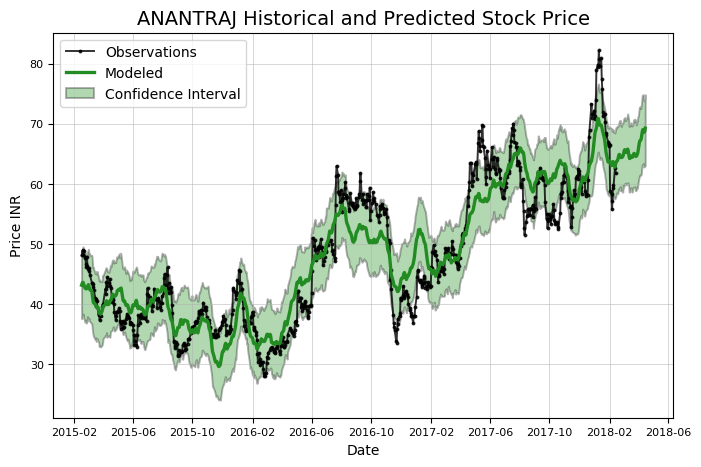

In [10]:
model, model_data = anant.create_prophet_model(days = 60)

# Now evaluating our predictions

For our predictions to be meaningful, we must evaluate them on real data.

One way to do this is set aside some historical data as a test set and use data from further back as our training set. In the default evaluation method, we test using the past year and train on the 3 years prior to the test period.

To quantify the accuracy of our predictions, we can find the average rupee error on both the testing and training data, the percentage the actual price was in the predicted confidence interval, and the percentage of times we predicted the correct direction for the stock.

C:\Users\133924\Documents\Hitachi Consulting\Financial Analytics\stocker\stocker.py:522: RuntimeWarning: invalid value encountered in sign
  test['correct'] = (np.sign(test['pred_diff']) == np.sign(test['real_diff'])) * 1



Prediction Range: 2017-02-14 to 2018-02-14.

Predicted price on 2018-02-13 = INR47.19.
Actual price on    2018-02-12 = INR62.65.

Average Absolute Error on Training Data = INR3.56.
Average Absolute Error on Testing  Data = INR10.19.

When the model predicted an increase, the price increased 48.44% of the time.
When the model predicted a  decrease, the price decreased  51.26% of the time.

The actual value was within the 80% confidence interval 40.32% of the time.


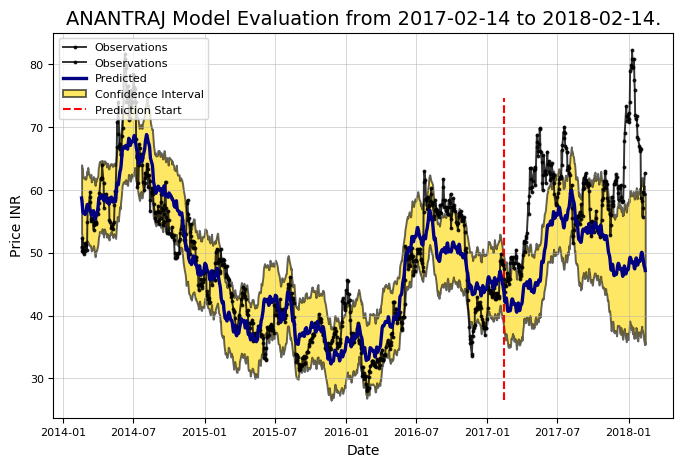

In [11]:
anant.evaluate_prediction()

The predictions are not very good clearly. We need to tweak some scale parameters to change how much weight the model gives to shift in data.

# Changepoint Prior Scale Selection

The changepoint prior scale represents the amount of weight given to the changepoints in the model. This can be used to control overfitting vs underfitting. A higher prior will create a model with more flexibility and more emphasis on the changepoints. This can lead to overfitting because the model will closely follow the training data. Lowering the prior decreases the model flexibility which can cause the opposite problem underfitting. This occurs when our model does not follow the training data closely enough and fails to learn the underlying relationships.

We can use two methods and choose our scale whatever works best for us, our aim being the prediction being on the right side most of the time

First, a graphical comparison. We assign some range of priors to get a feel of how they affect the model.

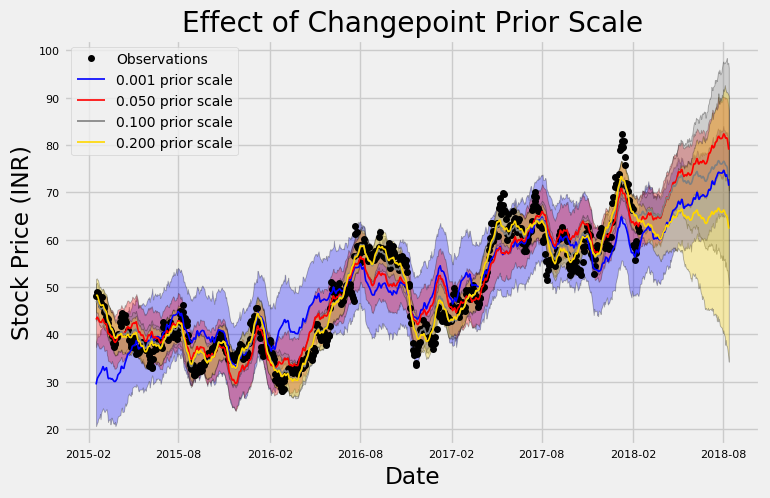

In [12]:
anant.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])

Next, a quantitative comparison. The changepoint prior validation method is designed to provide numerical backing. We are testing from 2017-02-12 to 2018-02-12, so we need to make sure to use a different validation range. We will select two years prior to the testing date range. The model will be trained on the three years prior to the validation period.


Validation Range 2016-02-01 to 2017-03-01.

     cps  train_err  train_range   test_err  test_range
0  0.001   6.266479    20.077638  17.729750   20.111374
1  0.050   2.908744     9.698361   7.565032   20.215249
2  0.100   2.845161     9.418698   7.410410   24.071384
3  0.200   2.611119     8.442053   6.738801   50.820723


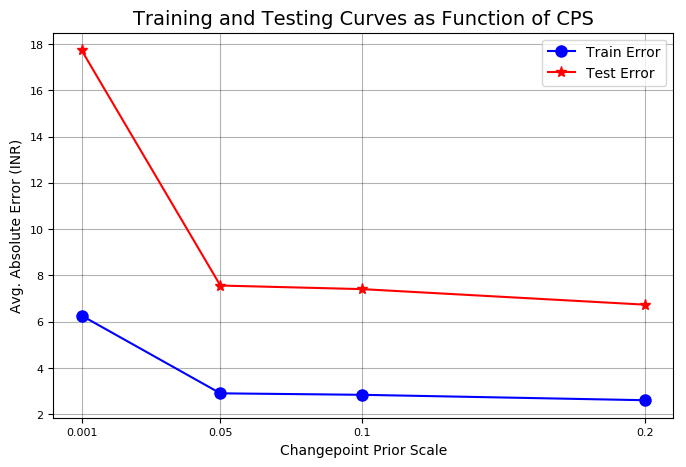

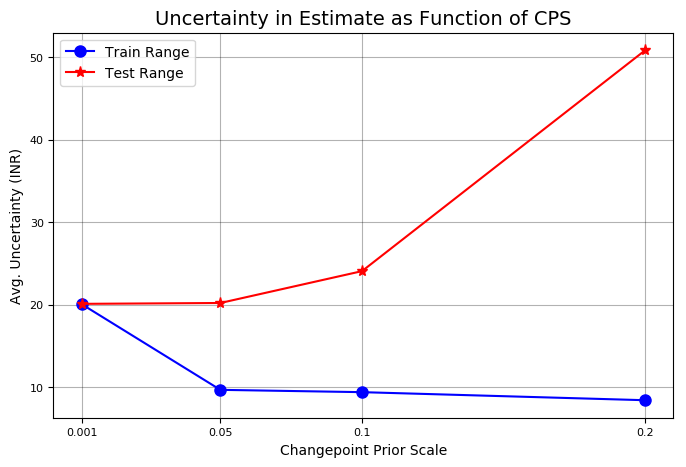

In [13]:
anant.changepoint_prior_validation(start_date = '2016-02-01', end_date = '2017-03-01', changepoint_priors=[0.001, 0.05, 0.1, 0.2])

Refining the model using different cps, as we can see the error decreases as we increase the priors.


Validation Range 2016-02-01 to 2017-04-28.

     cps  train_err  train_range   test_err  test_range
0  0.001   6.266479    20.045760  19.499804   20.042555
1  0.050   2.908744     9.680711   7.543983   23.494953
2  0.100   2.845161     9.423953   7.164338   27.931119
3  0.200   2.611119     8.465363   6.267909   65.316607
4  0.250   2.543949     8.207282   6.179152   81.714447
5  0.500   2.039384     6.534119   6.022921  250.832103


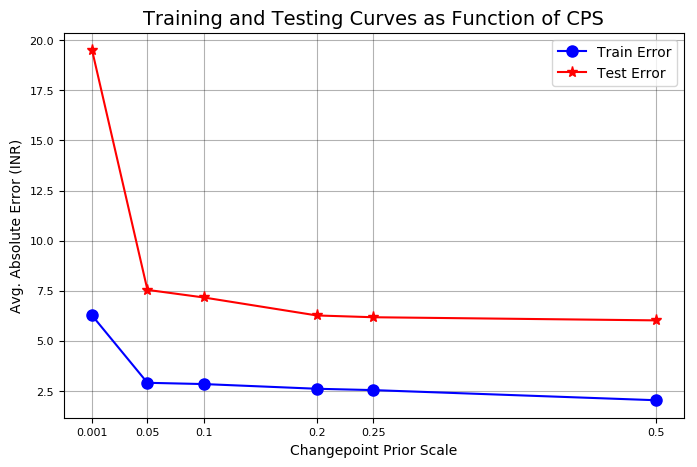

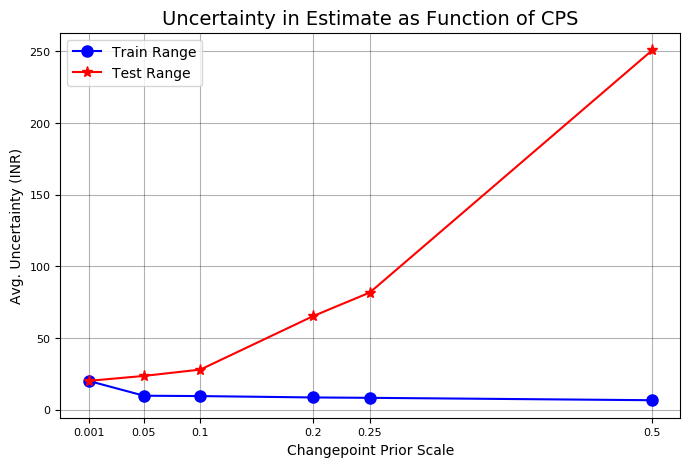

In [14]:
anant.changepoint_prior_validation(start_date = '2016-02-01', end_date = '2017-05-01', changepoint_priors=[0.001,0.05, 0.1, 0.2, 0.25,0.5])

# Now evaluating the prediction again 

0.5 seems to be a suitable prior to the model(I tested it several times changing the date range as well as the priors). Hence we set the prior to 0.5 and evaluate.

In [23]:
anant.changepoint_prior_scale = 0.5

C:\Users\133924\Documents\Hitachi Consulting\Financial Analytics\stocker\stocker.py:522: RuntimeWarning: invalid value encountered in sign
  test['correct'] = (np.sign(test['pred_diff']) == np.sign(test['real_diff'])) * 1



Prediction Range: 2017-02-14 to 2018-02-14.

Predicted price on 2018-02-13 = INR70.44.
Actual price on    2018-02-12 = INR62.65.

Average Absolute Error on Training Data = INR1.79.
Average Absolute Error on Testing  Data = INR10.22.

When the model predicted an increase, the price increased 48.61% of the time.
When the model predicted a  decrease, the price decreased  51.46% of the time.

The actual value was within the 80% confidence interval 98.79% of the time.


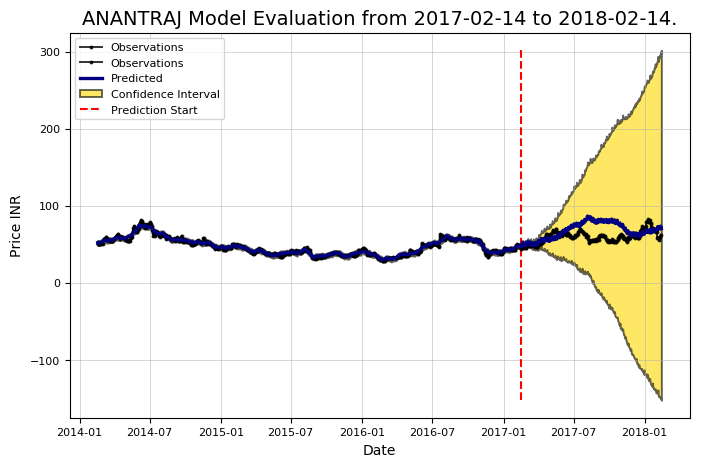

In [24]:
anant.evaluate_prediction()

In [25]:
anant.weekly_seasonality = True

C:\Users\133924\Documents\Hitachi Consulting\Financial Analytics\stocker\stocker.py:522: RuntimeWarning: invalid value encountered in sign
  test['correct'] = (np.sign(test['pred_diff']) == np.sign(test['real_diff'])) * 1



Prediction Range: 2017-02-14 to 2018-02-14.

Predicted price on 2018-02-13 = INR70.44.
Actual price on    2018-02-12 = INR62.65.

Average Absolute Error on Training Data = INR1.79.
Average Absolute Error on Testing  Data = INR10.22.

When the model predicted an increase, the price increased 48.61% of the time.
When the model predicted a  decrease, the price decreased  51.46% of the time.

The actual value was within the 80% confidence interval 98.39% of the time.


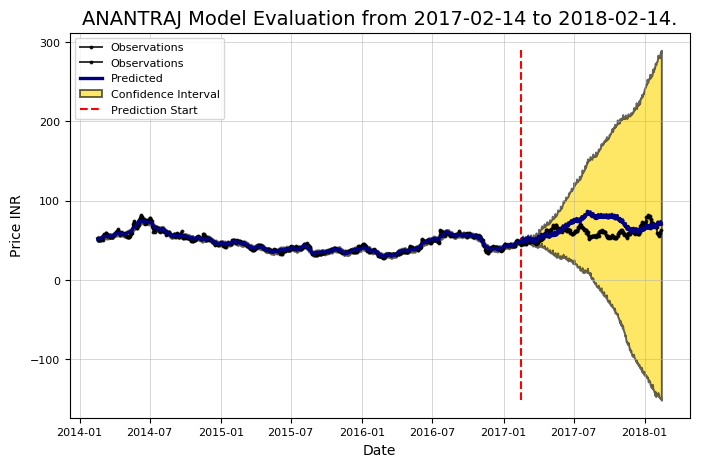

In [26]:
anant.evaluate_prediction()

There we set what is best for our model:

In [27]:
anant.changepoint_prior_scale = 0.5
anant.weekly_seasonality = True

# Finally it's time to play DA GAME!

(Copying the rules of the game from stocker.py- Thanks William.)
Here they are:

We will compare our model with the simple strategy of buying and holding over the same time period. The rules of our game are straightforward:

1. If we predict the price will increase, we buy stock on that day. If we predict a decrease, we do not play the market.
2. If we predicted an increase and the stock does increase, we recieve the change in price of the stock over that day times the number of shares.
3. If we predicted an increase and the stock decreases, we lose the change in price of the stock over that day times the number of shares.

We are assuming the "change in price of a share on that day" is the difference between the previous days' closing price and the closing price on our day. For example, if the closing price on Monday was \$14 and the closing price on Tuesday was \$18, we would call that a \$4 change on Tuesday. This is not entirely accurate as stocks prices change a small amount overnight, but it will be acceptable for our game.

C:\Users\133924\Documents\Hitachi Consulting\Financial Analytics\stocker\stocker.py:522: RuntimeWarning: invalid value encountered in sign
  test['correct'] = (np.sign(test['pred_diff']) == np.sign(test['real_diff'])) * 1
C:\Users\133924\Documents\Hitachi Consulting\Financial Analytics\stocker\stocker.py:613: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_pred_increase['pred_profit'] = prediction_profit


You played the stock market in ANANTRAJ from 2017-02-14 to 2018-02-14 with 500 shares.

When the model predicted an increase, the price increased 48.61% of the time.
When the model predicted a  decrease, the price decreased  51.46% of the time.

The total profit using the Prophet model = INR7600.00.
The Buy and Hold strategy profit =         INR8425.00.

Thanks for playing the stock market!



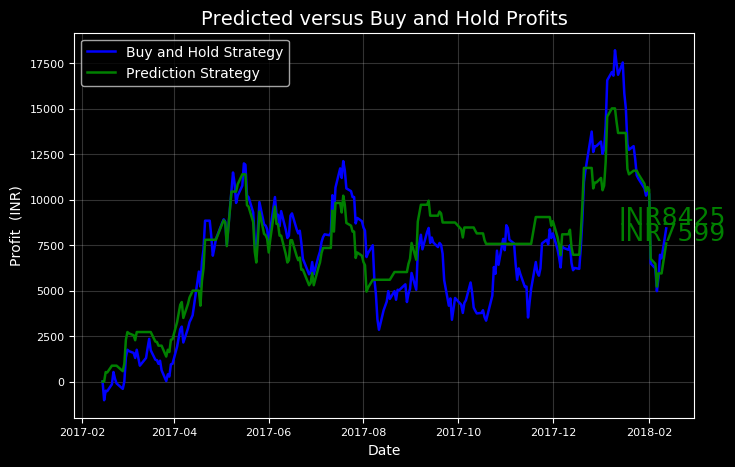

In [28]:
anant.evaluate_prediction(nshares = 500)

Notice that our profits do not depend on the difference between the final predicted price and the actual price, only on the percentage of the time we correctly predicted the direction. 

C:\Users\133924\Documents\Hitachi Consulting\Financial Analytics\stocker\stocker.py:522: RuntimeWarning: invalid value encountered in sign
  test['correct'] = (np.sign(test['pred_diff']) == np.sign(test['real_diff'])) * 1
C:\Users\133924\Documents\Hitachi Consulting\Financial Analytics\stocker\stocker.py:613: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_pred_increase['pred_profit'] = prediction_profit


You played the stock market in ANANTRAJ from 2014-06-22 to 2015-03-22 with 500 shares.

When the model predicted an increase, the price increased 47.11% of the time.
When the model predicted a  decrease, the price decreased  60.00% of the time.

The total profit using the Prophet model = INR-7750.00.
The Buy and Hold strategy profit =         INR-15925.00.

Thanks for playing the stock market!



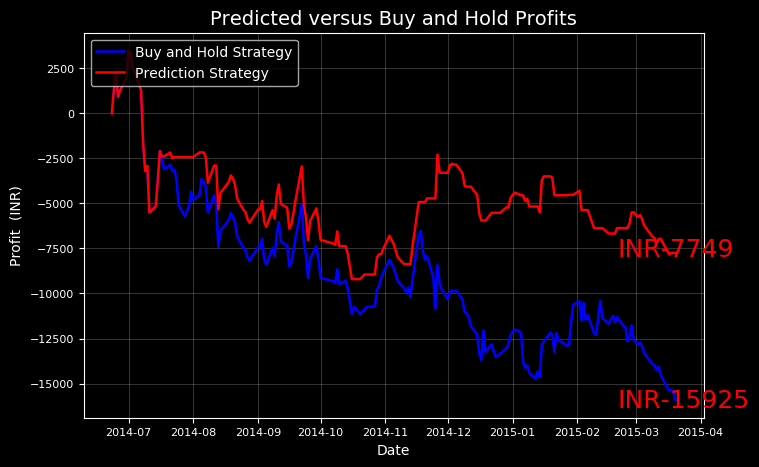

In [ ]:
anant.evaluate_prediction(start_date = '2014-06-22', end_date = '2015-03-22', nshares=500)

# Time to predict the future (that's what we want right!)

This function automatically trains on the past 3 years and makes predictions with the uncertainty intervals.

In [ ]:
anant.predict_future(days = 60)